In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:

# Define system matrices
τ = 0.1
A = np.array([[1, τ, 0, 0], 
              [0, 1, 0, 0],
              [0, 0, 1, τ],
              [0, 0, 0, 1]])  
B = np.array([[0.5 * τ ** 2, 0],
              [τ, 0],
              [0, 0.5 * τ ** 2],
              [0, τ]])  


In [4]:

# Control input (constant or time-varying)
def goto(i, u_k, x, u, v, x_target, y_target):
    if x[0, 0] > 5 or x[0, 0] < 0 or x[2, 0] > 5 or x[2, 0] < 0:
        print(f"Error at {i}, {x[0, 0]}, {x[2, 0]}")
    if x[0, 0] < x_target[0]:
        u_k[0] = (1+v)*(1-v)
    elif x[0, 0] <= x_target[1]:
        if v < 0.5:
            u_k[0] = -2 * v
        elif v < 0.25:
            u_k[0] = -4 * v
        else:
            u_k[0] = -v        
    else:
        u_k[0] = (1+v)*(v-1)
    if x[2, 0] < y_target[0]:
        u_k[1] = (1+u)*(1-u)
    elif x[2, 0] <= y_target[1]:
        if v < 0.5:
            u_k[1] = -2 * u
        elif v < 0.25:
            u_k[1] = -4 * u
        else:
            u_k[1] = -u        
    else:
        u_k[1] = (1+u)*(u-1)        
    return u_k
    
def input(i, x):
    u_k = np.zeros((2, 1))
    v = x[1, 0]
    u = x[3, 0]
    xpos = x[0, 0]
    ypos = x[2, 0]
    if 0 <= xpos <= 2 and 0 <= ypos <= 1: # 2
        u_k = goto(i, u_k, x, u, v, [2, 3], [0, 1])
    elif 0 <= xpos <= 2 and 2 <= ypos <= 3: # 2
        u_k = goto(i, u_k, x, u, v, [2, 3], [2, 3])
    elif 0 <= xpos <= 1 and 1 <= ypos <= 2: # 3
        u_k = goto(i, u_k, x, u, v, [0, 1], [2, 3])
    elif 0 <= xpos <= 1 and 3 <= ypos <= 5: # 4
        u_k = goto(i, u_k, x, u, v, [0, 1], [2, 3])
    elif 2 <= xpos <= 4 and 0 <= ypos <= 4: # 5
        u_k = goto(i, u_k, x, u, v, [3, 4], [4, 5])
    elif 2 <= xpos <= 3 and 4 <= ypos <= 5: # 6
        u_k = goto(i, u_k, x, u, v, [3, 4], [4, 5])
    elif 4 <= xpos <= 5 and 0 <= ypos <= 1: # 7
        u_k = goto(i, u_k, x, u, v, [3, 4], [0, 1])
    elif 4 <= xpos <= 5 and 2 <= ypos <= 2.5: # 8
        u_k = goto(i, u_k, x, u, v, [3, 4], [2, 3])
    elif 4 <= xpos <= 5 and 3.5 <= ypos <= 4: # 9
        u_k = goto(i, u_k, x, u, v, [4, 5], [4, 5])
    elif 3 <= xpos <= 4 and 4 <= ypos <= 5: # 10
        u_k = goto(i, u_k, x, u, v, [4, 5], [4, 5])
    else:
        u_k = goto(i, u_k, x, u, v, [4, 5], [4, 5])
    return u_k


For initial position of (0.5, 3.0) and initial velocity of (0.01, -0.5), the final position is (4.48891650519974, 4.636178595250355), the final velocity is (2.3834318734137834e-44, 1.0279657573471008e-44), and final acceleration is (-5.958579683534459e-44, 2.3834318734137834e-44).
For initial position of (1.2, 0.5) and initial velocity of (-0.7, 0.3), the final position is (4.386868663136829, 4.571997809037878), the final velocity is (5.750515307222539e-42, 2.1846205514442297e-42), and final acceleration is (-1.4376288268056348e-41, 5.750515307222539e-42).
For initial position of (0.3, 4.7) and initial velocity of (0.0, 0.2), the final position is (4.532789945485392, 4.577495203246048), the final velocity is (2.9680905954507196e-41, 9.351720198955069e-42), and final acceleration is (-7.420226488626799e-41, 2.9680905954507196e-41).
For initial position of (2.5, 4.7) and initial velocity of (0.0, -0.2), the final position is (4.742898522614531, 4.586108966050439), the final velocity is (

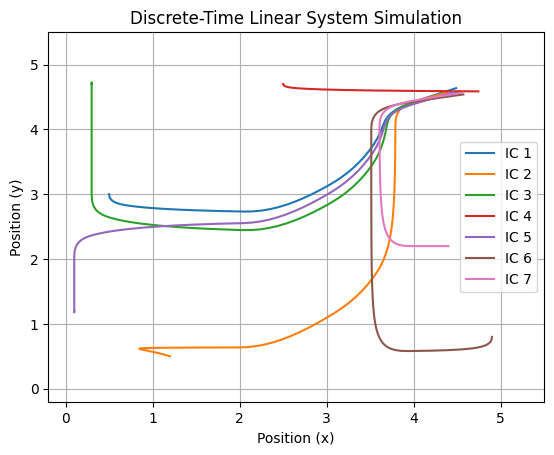

In [5]:

# Simulate the system
def trajectory(x_0):
    num_steps = 500
    x_k = x_0
    states = [x_k]
    acceleration = np.empty((2, 0))
    for i in range(num_steps):
        u_k = input(i, x_k)
        x_k = A @ x_k + B @ u_k
        states.append(x_k)
        acceleration = np.concatenate((acceleration, u_k), axis = 1)
    acceleration = np.concatenate((acceleration, u_k), axis = 1)
    # Convert states to array for analysis
    states = np.hstack(states)
    time = np.arange(num_steps + 1)
    print(f"For initial position of ({states[0, 0]}, {states[2, 0]}) and initial velocity of ({states[1, 0]}, {states[3, 0]}), the final position is ({states[0, -1]}, {states[2, -1]}), the final velocity is ({states[1, -1]}, {states[3, -1]}), and final acceleration is ({acceleration[0, -1]}, {states[1, -1]}).")
    return states, acceleration, time

# Run simulation
x_0_1 = np.array([[0.5],  # Position (x)
                [0.01],  # Velocity (x)
                [3],  # Position (y)
                [-0.5]]) # Velocity (y)
st1, ac1, time = trajectory(x_0_1)
#plt.plot(time, states[0, :], label="Position (x)")
#plt.plot(time, states[1, :], label="Velocity (x)")
#plt.plot(time, acceleration[0, :], label="Acceleration (x)")
#plt.xlabel("Time step (k)")
#plt.ylabel("State values")
#plt.legend()
#plt.title("Discrete-Time Linear System Simulation")
#plt.show()
x_0_2 = np.array([[1.2], [-0.7], [0.5], [0.3]]) 
st2, ac2, time = trajectory(x_0_2)
x_0_3 = np.array([[0.3], [0], [4.7], [0.2]])
st3, ac3, time = trajectory(x_0_3)
x_0_4 = np.array([[2.5], [0], [4.7], [-0.2]])
st4, ac4, time = trajectory(x_0_4)
x_0_5 = np.array([[0.1], [0], [1.2], [-0.2]])
st5, ac5, time = trajectory(x_0_5)
x_0_6 = np.array([[4.9], [0], [0.8], [-0.5]])
st6, ac6, time = trajectory(x_0_6)
x_0_7 = np.array([[4.4], [0], [2.2], [0]])
st7, ac7, time = trajectory(x_0_7)
plt.plot(st1[0, :], st1[2, :], label="IC 1")
plt.plot(st2[0, :], st2[2, :], label="IC 2")
plt.plot(st3[0, :], st3[2, :], label="IC 3")
plt.plot(st4[0, :], st4[2, :], label="IC 4")
plt.plot(st5[0, :], st5[2, :], label="IC 5")
plt.plot(st6[0, :], st6[2, :], label="IC 6")
plt.plot(st7[0, :], st7[2, :], label="IC 7")
plt.xlabel("Position (x)")
plt.ylabel("Position (y)")
plt.legend()
plt.title("Discrete-Time Linear System Simulation")
plt.xlim(-0.2, 5.5)
plt.ylim(-0.2, 5.5)
plt.grid()
plt.show()